# <a id="#">Task 3 – Mean, median, and Gaussian filtering</a>

In [3]:
import numpy
import matplotlib.pyplot as plt

---

## Linear filtering by convolution (mean filter)

**<a id="#">Task 3.1.1.</a>** Load the image `data/astronaut.png` and show it:

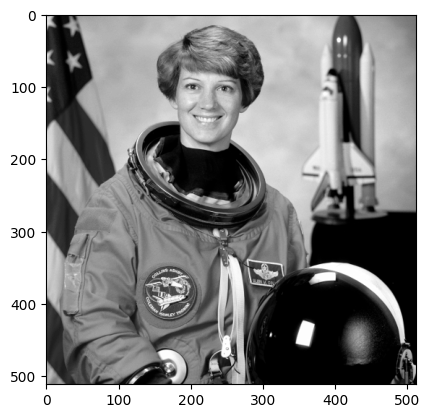

In [4]:

img = plt.imread('data/astronaut.png')
plt.figure()
plt.imshow(img, 'grey')

**<a id="#">Task 3.1.2.</a>** Implement a mean filter:

In [5]:
def meanfilter(img_in, size):
    result = numpy.zeros(img_in.shape)
    n = (size - 1) // 2
    for p in numpy.ndindex(img_in.shape):
        neighborhood_sum = 0
        if p[0] < n or p[1] < n or p[0] >= img_in.shape[0] - n or p[1] >= img_in.shape[1] - n:
            result[p] = 0
        else:
            for q in numpy.ndindex(size, size):
                neighborhood_sum = neighborhood_sum + img_in[p[0] + q[0] - n, p[1] + q[1] - n]
            result[p] = neighborhood_sum/(size*size)       

    return result

**<a id="#">Task 3.1.3.</a>** Test your implementation from above by using the function `meanfilter` for the previously loaded image and show the result:

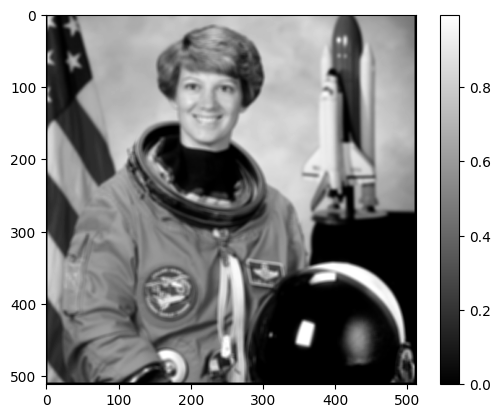

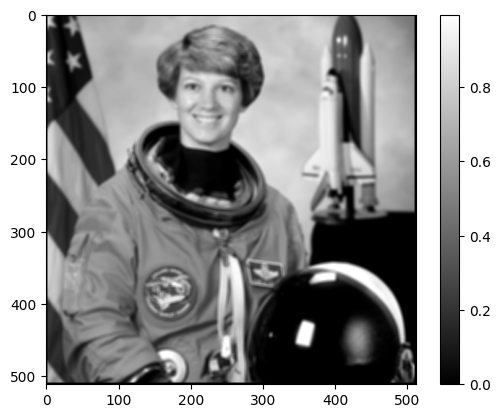

In [6]:
imgm = meanfilter(img, 5)
plt.imshow(imgm, 'gray')
plt.colorbar()

astronaut_meanfilter5 = plt.imread('data/astronaut_meanfilter5.png')
plt.figure()
plt.imshow(astronaut_meanfilter5, 'gray')
plt.colorbar()

In [7]:
print(astronaut_meanfilter5[100,100])

print(imgm[100,100])

0.7008621
0.7008627629280091


**<a id="#">Task 3.1.4.</a>** Compare your result for filter size `5` with the correct result image `data/astronaut_meanfilter5.png`:

---

## Non-linear filtering

**<a id="#">Task 3.2.1.</a>** Implement a median filter:

In [8]:
def medianfilter(img_in, size):
    result = numpy.zeros(img_in.shape)
    n = (size - 1) // 2
    for p in numpy.ndindex(img_in.shape):
        if p[0] < n or p[1] < n or p[0] >= img_in.shape[0] - n or p[1] >= img_in.shape[1] - n:
            result[p] = 0
        else:
            neighborhood_list = list ()
            for q in numpy.ndindex(size, size):
                neighborhood_list.append(img_in[p[0] + q[0] - n, p[1] + q[1] - n])
            result[p] = numpy.median(neighborhood_list)  
    return result

**<a id="#">Task 3.2.2.</a>** First, test your implementation from above by using the function `medianfilter` for the previously loaded image and show the result:

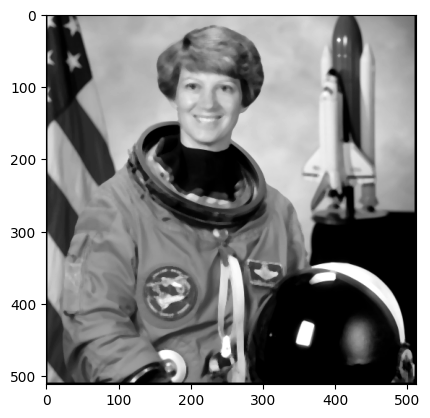

In [9]:
img_medianfilter = medianfilter(img, 5)
plt.imshow(img_medianfilter, 'gray')

Then, compare your result for filter size `5` with the correct result image `data/astronaut_medianfilter5.png`:

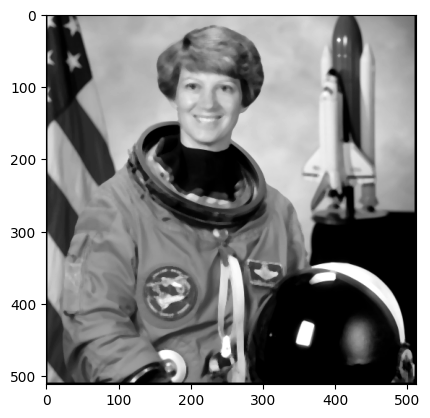

In [10]:
img_medianfilter5 = plt.imread('data/astronaut_medianfilter5.png')
plt.figure()
plt.imshow(img_medianfilter5, 'gray')

---

## Using pre-implemented filters

**<a id="#">Task 3.3.1.</a>** Load the package `scipy.ndimage`:

In [11]:
import scipy.ndimage

**<a id="#">Task 3.3.2 (a).</a>** Apply a **mean filter** from `scipy.ndimage` to the loaded image:

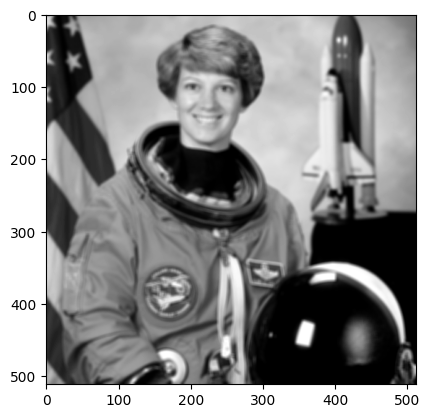

In [15]:
plt.imshow(scipy.ndimage.uniform_filter(img, 5), 'gray')


**<a id="#">Task 3.3.2 (b).</a>** Apply a **median filter** from `scipy.ndimage` to the loaded image:

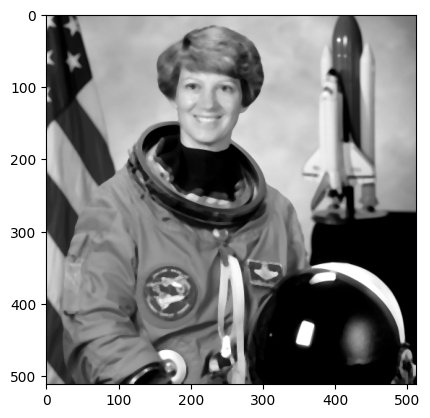

In [16]:
plt.imshow(scipy.ndimage.median_filter(img, 5), 'gray')

**<a id="#">Task 3.3.2 (c).</a>** Apply a **Gaussian filter** from `scipy.ndimage` to the loaded image:

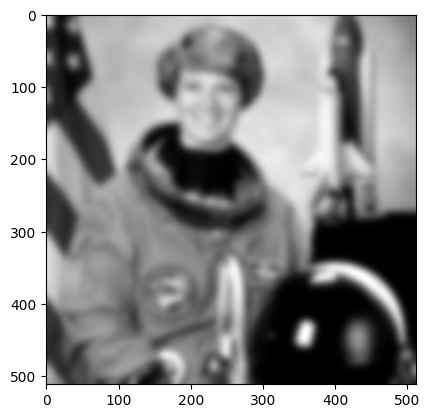

In [22]:
plt.imshow(scipy.ndimage.gaussian_filter(img, 5), 'gray')

**<a id="#">Task 3.3.3.</a>** Compare the results obtained using the functions from `scipy.ndimage` with those you obtained using your own implementations. What are the main differences? Do you have an explanation?

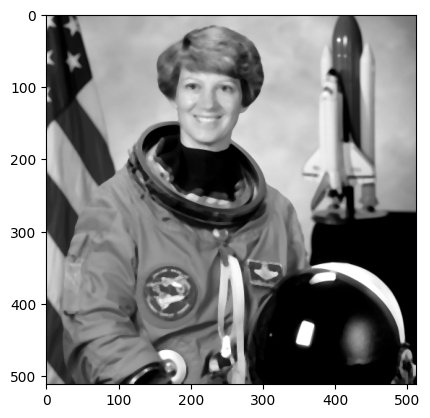

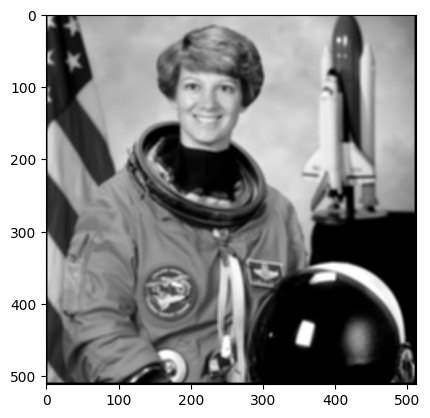

In [24]:
plt.imshow(scipy.ndimage.median_filter(img, 5), 'gray')

plt.figure()
plt.imshow(meanfilter(img, 5), 'gray')

---

## Slicing and benchmarking

**<a id="#">Task 3.4.2.</a>** Implement either a mean filter or a median filter using only a single `for`-loop:

In [13]:
def fastfilter(img_in, size):
    ...

**<a id="#">Task 3.4.3.</a>** First, test your implementation from above by using the function `fastfilter` for the previously loaded image and show the result:

Then, compare your result to those obtained using your implementation for either `meanfilter` or `medianfilter`, respectively:

**<a id="#">Task 3.4.4.</a>** Benchmark the code run times:

**<a id="#">Task 3.4.5.</a>** Document your observations regarding the benchmarking results and try to think of an explanation: